# Mean Shift 군집화

* Mean Shift는 KDE(Kernel Density Esitimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행

* 별도의 군집화 개수를 지정하지 않으며 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함

## Mean Shift 수행 절차



![](./img/MeanShift1.png)

<h2>KDE(Kernel Density Estimation</h2><br>



<img src="./img/KDE1.png"/>

<h2> 확률 밀도 추정 방법</h2><br>



<img src="./img/Parametric1.png"/>

<h2> 비모수적 밀도 추정= 히스토그램(Histogram)</h2><br>

직관적이고 편리한 방법임

그러나 문제점이 좀 있음.

<img src="./img/Histogram1.png"/>


<h2>비모수적 밀도 추정 - KDE</h2><br>

**히스토그램의 문제점 해결을 위해 KDE가 쓰일 수 있다.**

<img src="./img/KDE2.png" />

<h2>KDE와 가우시안 커널함수</h2><br>

h = bandwidth가 중요하다 h를 말하기 위해 복잡한 수식들을 적어놓음.

bandwidth가 타이트하면 뾰족하게 나올것임. 넓다면 완만하게 나올 것임. 최적의 bandwidth를 찾는게 KDE에선 매우 중요함.


<img src="./img/kernel1.png"/>

<h2>Bandwidth에 따른 KDE 변화</h2><br>

<img src="./img/BandwitdhKDE1.png"/><br>
<img src="./img/BandwitdhKDE2.png"/>

<h2>사이킷런 Mean Shift</h2><br>

* 사이킷런은 Mean Shift 군집화를 위해 MeanShift 클래스를 제공<br>

* MeanShift 클래스의 가장 중요한 포기화 파라미터는 <span style="color:red"><b>bandwidth</b></span>이며 해당 파라미터는 밀도 중심으로 이동할때 사용되는 커널 함수의 bandwidth임. 이 bandwidth를 어떻게 설정하느냐에 따라 군집화 성능이 달라짐.<br>

* 최적의 bandwidth 계산을 위해 사이킷런은 estimate_bandwidth()함수를 제공

### KDE(Kernel Density Estimation)의 이해

**seaborn의 distplot()을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


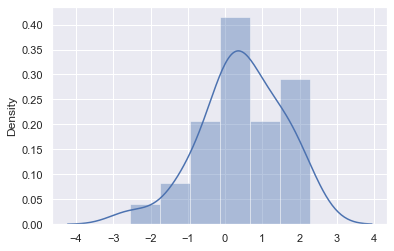

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 평균이 0이고 표준편차가 1인 랜덤을 30개를 만들 것
print(x)
sns.distplot(x);

위 그림 자체가 KDE로 추정을 한 거다.

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


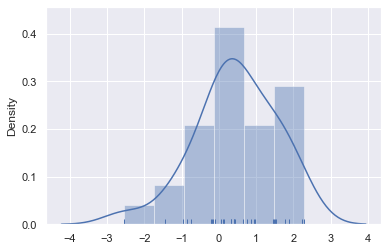

In [2]:
sns.distplot(x, rug=True) # rug의 디폴트값은 False인데, rug가 뭔지 보여주려고 해보는 것임

위랑 비교해보면 밑에 약간 파란색의 표시가 있는데, 밀집도를 알 수 가 있다.

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


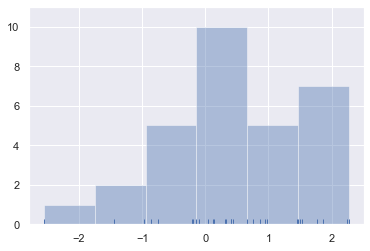

In [3]:
sns.distplot(x, kde=False, rug=True)

KDE를 Flase로 하면 히스토그램만 그려줄 수 있다.

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


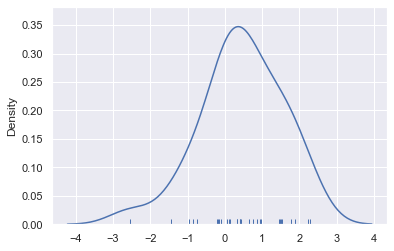

In [4]:
sns.distplot(x, hist=False, rug=True);

hist를 False로 하면 KDE만 나온다.

**개별 관측데이터에 대해 가우시안 커널 함수를 적용...**

적용한 다음에 그 커널함수를 더한 후에 정규화를 위해서 샘플데이터 갯수만큼 나눈다. 

그것을 해볼 것임.

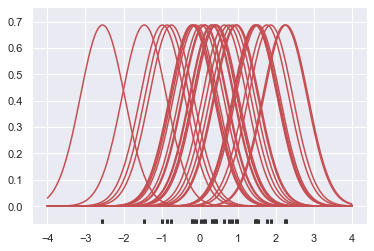

In [5]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)-> 관측된 샘플데이터가 이거다. 앞에서 만들어줬다. 그러므로 주석처리
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200) # -4에서 4까지 200개를 촘촘하게 출력해줌

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

x가 30개 뭉쳐있는것임. 개별 데이터셋을 평균으로 가지는 가우시안커널함수가 만들어짐.

밀집되어있는 공간에서 굉장히 많은 가우시안커널함수가 생기고


이제 아래에서부터 더한 다음에 정규화를 위해서 나누게 되고 플롯하면 결과가 나온다.

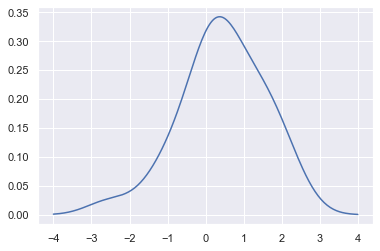

In [6]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

**seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음**

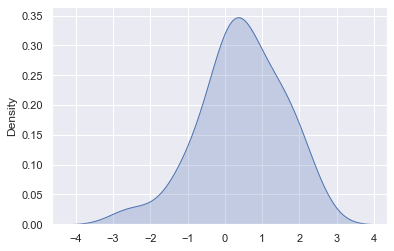

In [7]:
sns.kdeplot(x, shade=True);

**bandwidth에 따른 KDE 변화**

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


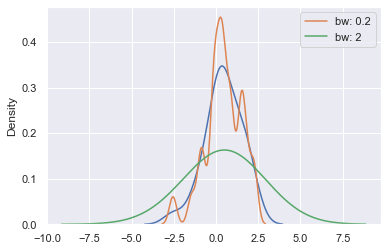

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

### 사이킷런을 이용한 Mean Shift 

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) 
# 원래  위에 cluster_abels에서 200개가 나오는데 np.unique를 했기 때문에 클러스터 유형만 나오는 것임

cluster labels 유형: [0 1 2 3 4 5 6 7]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [10]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [11]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.25)

# quantile이란 meanshift가 샘플링을 할때 샘플링의 데이터 개수를 필터링할 때 쓰는 파라미터
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [12]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=1.6889636737559222 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


cluster labels 유형: [0 1 2]


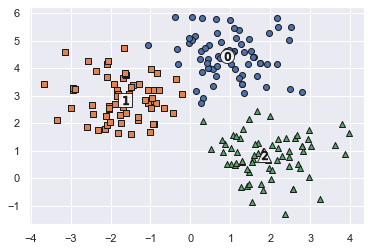

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [15]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


위의 타겟과 meanshift_label은 군집화가 저렇게 되었다는거지 숫자가 같아야 한다는 뜻은 아님!

2 하나만 잘못되었다.

meanshift는 가장 큰 단점은 width에 너무 민감하다. 일반적으로 meanshift는 데이터 마이닝보다는 영상, 오브젝트 트래킹에 관한쪽에 잘 사용되는 알고리즘이다.